<a href="https://colab.research.google.com/github/fajartria/ChurnMLPred/blob/main/Communication_Skills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Communication Skills Group Assignment
We will be using this just to collaborate, once everything is ready, we will move them to Jupyter Notebook

## General Workflow
### 1) Identifying Business Problem
### 2) Data Preprocessing
### 3) Exploratory Data Analysis (EDA)
### 4) Model Development & Evaluation
### 5) Model Interpretability
### 6) Reporting & Dashboard

### 1) Identifying Business Problem

In this case, we're asked to develop a churn prediction develop model for a telecommunication company. This model will be used to predict customer churn within a given dataset. The model will be trained based on the previously available data which contains more than 15 features and its label (whether a customer churned or not)

The model is expected to have a good performance and high interpretability. In addition, the result of the model (customer that is predicted to be churning) will receive further treatment by the marketing department.

### 2) Data Preprocessing

In [1]:
# Import Pandas for data manipulation purposes 

import pandas as pd

In [2]:
# Reading file (We will change this method in Jupyter notebook, as for now, we will use this function for reading data in google collab)
from google.colab import files
  
uploaded = files.upload()

import io
  
df_train = pd.read_csv(io.BytesIO(uploaded['churn_train.csv']))


Saving churn_train.csv to churn_train.csv


In [3]:
# Inspect the Data
df_train.info()

# Check the first 5 Rows of the Data
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


We can see that there are around 4k data with 20 columns (19 features and 1 target). The data does not contain null values.

As we will be developing a Machine learning Model, it is better to drop the state and area_code column and exclude them from the analysis (logically speaking these 2 features doesn't impact a prediction). A one hot encoder will also be needed for international_plan, voice_mail_plan and churn column.

In [4]:
# Drop the columns we dont need

df_train.drop('state', axis=1, inplace=True)
df_train.drop('area_code', axis=1, inplace=True)

# Re-inspect the Data
df_train.info()

# Check the first 5 Rows of the Data
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   international_plan             4250 non-null   object 
 2   voice_mail_plan                4250 non-null   object 
 3   number_vmail_messages          4250 non-null   int64  
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   int64  
 6   total_day_charge               4250 non-null   float64
 7   total_eve_minutes              4250 non-null   float64
 8   total_eve_calls                4250 non-null   int64  
 9   total_eve_charge               4250 non-null   float64
 10  total_night_minutes            4250 non-null   float64
 11  total_night_calls              4250 non-null   int64  
 12  total_night_charge             4250 non-null   f

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


NameError: ignored

### 3) Exploratory Data Analysis (EDA)

In this step, we're going to explore what our data tells us. We're going to analyse whether if the features are correlated, if certain group of customers are churning more compared to others, and so on.

### What are the correlation between all the features?

Theoretically, some features within our dataset should already have some kind of positive correlation. For example, the total number of calls, total minutes of calls, and the total charge should be related to each other.

It might be possible to, instead of using all of them for developing a model, to just use one of them since they are related to each other. But we will investigate more about this during the model evaluation process

import success


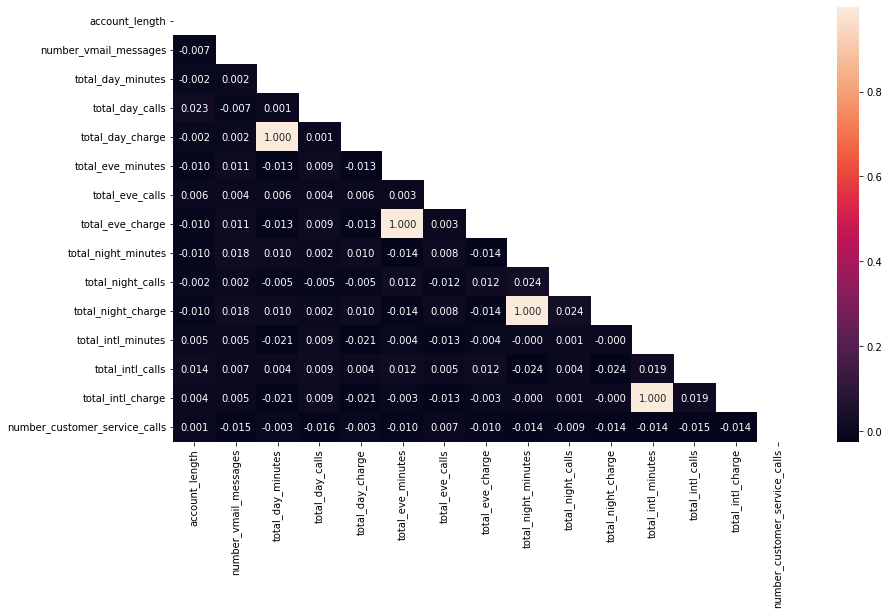

In [17]:
# Correlation Matrix

import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Heatmap
fig = plt.figure(figsize=(14,8))
#sns.heatmap(corr, mask=mask, cmap=plt.cm.bwr, center=0, annot=True, fmt='.2f', square=True)
sns.heatmap(corr, annot = True,  fmt='.3f', mask = mask)

From the graph above we can see clearly most of the features doesn't have any correlation with it. What's interesting here is that there is a really strong positive correlation between the total charge and total minutes, and this applies to all 3 different times (day, evening, night). This goes along with our logical sense which is a total charge will depend on how long does a customer spend time in a call. This means that only 1 feature out of the 2 will be used to develop our model. 

### Is there a correlation between Number of CS calls and churn?

One of the thing that might be interesting to investigate is whether a higher number of CS calls leads to a higher churn. Some business assumption here is that when a customer make a lot of CS calls, it might be the customer is having a problem, and a customer with a problem will have a higher probability to churn.

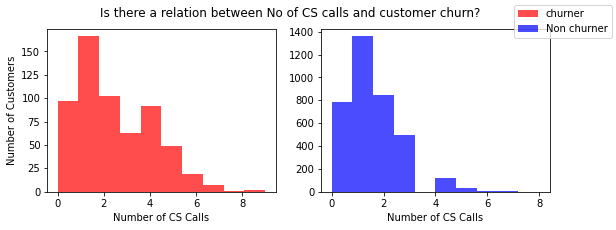

In [6]:
# Import Matplotlib for Visualisation purposes
from matplotlib import pyplot as plt

# Splitting the Data into Churners and Non Churners
C = df_train[df_train["churn"] == "yes"]
NC = df_train[df_train["churn"] == "no"]

# Define new variables for plotting
x = C["number_customer_service_calls"]
x1 = NC["number_customer_service_calls"]
y = C["churn"]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
axs[0].hist(x, color = 'r', alpha=0.7, label = 'churner')
axs[1].hist(x1, color = 'b', alpha=0.7, label = 'Non churner')
fig.suptitle('Is there a relation between No of CS calls and customer churn?')
axs[0].set_xlabel('Number of CS Calls')
axs[1].set_xlabel('Number of CS Calls')
axs[0].set_ylabel('Number of Customers')
fig.legend()
plt.show()

At a glance, there seem to be no difference between the Non churners and the churners. They have different total number of customers but that is because we have more Non churners in our dataset. But if we take a look closely on the high Number of CS calls, we could see that the churners have made a slightly more CS calls.

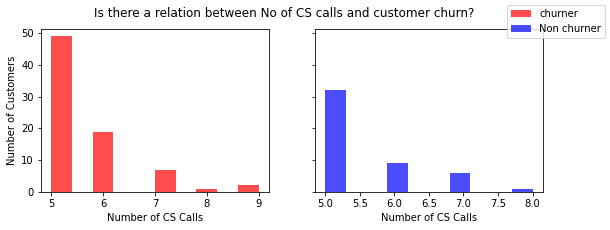

In [7]:
# Import Matplotlib for Visualisation purposes
from matplotlib import pyplot as plt

# Splitting the Data into Churners and Non Churners
C = df_train[(df_train["churn"] == "yes") & (df_train["number_customer_service_calls"] > 4)]
NC = df_train[(df_train["churn"] == "no") & (df_train["number_customer_service_calls"] > 4)]

# Define new variables for plotting
x = C["number_customer_service_calls"]
x1 = NC["number_customer_service_calls"]
y = C["churn"]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey = True)
axs[0].hist(x, color = 'r', alpha=0.7, label = 'churner')
axs[1].hist(x1, color = 'b', alpha=0.7, label = 'Non churner')
fig.suptitle('Is there a relation between No of CS calls and customer churn?')
axs[0].set_xlabel('Number of CS Calls')
axs[1].set_xlabel('Number of CS Calls')
axs[0].set_ylabel('Number of Customers')
fig.legend()
plt.show()

We can investigate it more clearly by plotting the Non Churners and the churners again, but this time only for the high number of CS calls, we could see it clearly now that there are more churned customers, and a small portion of them made a really high Number of CS calls.

In [ ]:
# You guys can add more Data Analysis, but i suggest limiting them to only 1 analysis per person, some ideas to be analysed are:
# Are there any outliers within the data? (use boxplot to check)
# correlation between total calls and churn 
# correlation between account length and churn
# and many more